# [MNIST](http://yann.lecun.com/exdb/mnist/) dataset

## Tensorflow

Extracting MINST_data/train-images-idx3-ubyte.gz
Extracting MINST_data/train-labels-idx1-ubyte.gz
Extracting MINST_data/t10k-images-idx3-ubyte.gz
Extracting MINST_data/t10k-labels-idx1-ubyte.gz
Acurácia 0.098


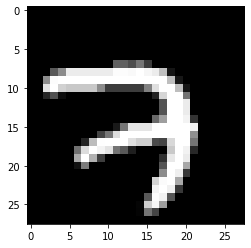

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('MINST_data/',one_hot=True)
dim = int(np.sqrt(mnist.train.images.shape[1])) # tranform the vector in a matrix finding the dimention
plt.imshow(mnist.train.images[0].reshape(dim,dim),cmap="gray")

x = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

y = tf.nn.softmax(tf.matmul(x,W)+b)
y_ = tf.placeholder(tf.float32,shape=[None,10])

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ - tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cross_entropy)

session = tf.InteractiveSession() 
tf.global_variables_initializer().run()

for i in range(10):
    batch_x,batch_y = mnist.train.next_batch(100)
    session.run(train_step,feed_dict={x: batch_x, y_: batch_y})

predicao_correta = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
acuracia = tf.reduce_mean(tf.cast(predicao_correta,tf.float32))

print('Acurácia',session.run(acuracia,feed_dict={x:mnist.test.images, y_:mnist.test.labels}))
session.close()

## Scikit Learning

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=5000, test_size=10000)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = MLPClassifier(alpha=1,learning_rate_init=0.01, max_iter=1000)
clf.fit(X_train, y_train)

score = clf.score(X_test, y_test)
print(score)

0.9255
